#University of San Diego - AAI-530(02) *Data Analytics and Internet of Things*

**FINAL TEAM PROJECT**

**TEAM 2:** *Arifa Kokab, Muhammad Haris and Tyler Clinscales*

#Harvest Sense: *AI-Driven Crop Yield and Soil Quality Prediction*

**Implementation of LSTM and Random Forest Models for Precision Agriculture**

This code presents the development and deployment of advanced machine learning models to enhance agricultural decision-making through predictive analytics.

The LSTM (Long Short-Term Memory) model is employed to forecast crop yield per crop type by analyzing historical data, environmental factors, and soil conditions, capturing complex temporal dependencies for more accurate predictions. Simultaneously, the Random Forest model is used to assess soil quality per crop type, leveraging ensemble learning techniques to identify key soil attributes influencing agricultural productivity.

By integrating these models, Harvest Sense provides a robust framework for precision agriculture, enabling farmers and stakeholders to make data-driven decisions regarding crop selection, resource allocation, and sustainability practices. These predictive insights help optimize yield, improve soil health, and enhance overall agricultural efficiency, making farming more resilient to environmental fluctuations.

#Dataset Overview: Comprehensive Crop Yield and Environmental Factors (2014-2023)

This dataset provides a detailed, synthetic representation of crop yield and the environmental factors influencing agricultural productivity over a decade (2014-2023). It contains daily observations, making it highly valuable for time-series forecasting, predictive modeling, and data-driven agricultural insights. The dataset includes ten major crops—such as Wheat, Corn, Rice, and Sugarcane—grown across five different soil types with varying nutrient levels (NPK), soil pH, temperature, humidity, and wind speed. These features allow for a granular understanding of how different environmental conditions impact crop yield and soil quality over time.

The dataset was generated using a domain-specific synthetic modeling approach, incorporating real-world agricultural principles. Soil pH levels were assigned based on natural ranges, NPK nutrient levels were adjusted according to crop-specific needs, and seasonal temperature and humidity trends were factored into the data generation process. The crop yield metric (in metric tons per hectare) was estimated using a predictive model that considers nutrient availability, temperature suitability, and humidity levels. Similarly, a soil quality index was derived to measure the fertility and health of the soil based on its nutrient composition and pH balance.

This dataset is ideal for predictive modeling, climate impact analysis, soil and crop management strategies, and data visualization applications. It enables researchers and data scientists to explore relationships between environmental variables, develop AI-driven forecasting models, and create insightful dashboards for decision-making. Although synthetic in nature, the dataset follows structured agricultural modeling techniques, making it a valuable tool for academic research, machine learning applications, and precision agriculture advancements.

Link to dataset: www.kaggle.com/datasets/madhankumar789/crop-yield-and-environmental-factors-2014-2023

#Importing Essential Libraries for Data Processing and Machine Learning

**Initializing Key Dependencies for Data Analysis, Visualization, and Predictive Modeling**

This section imports the necessary libraries for conducting data preprocessing, exploratory data analysis, and machine learning model development within the Harvest Sense project. The dataset is managed and processed using pandas and numpy, allowing for efficient handling of structured data and numerical computations. To visualize trends, distributions, and correlations within the dataset, matplotlib, seaborn, and matplotlib.dates are used to generate informative graphical representations. Machine learning techniques are implemented using scikit-learn, which provides tools for feature scaling with StandardScaler, categorical encoding with LabelEncoder, and performance evaluation through metrics such as mean_absolute_error, mean_squared_error, and r2_score. The predictive models for soil quality and crop yield are built using RandomForestRegressor for traditional machine learning and tensorflow.keras, incorporating LSTM, Dense, Dropout, and Sequential layers for deep learning-based time-series forecasting. Additionally, google.colab.files facilitates seamless data import and export, ensuring efficient interaction with datasets within the Colab environment. This combination of libraries establishes a robust framework for integrating machine learning and deep learning methodologies to enhance data-driven decision-making in smart agriculture.

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from google.colab import files
import matplotlib.dates as mdates

#Loading and Exploring the Crop Yield Dataset

**Accessing Data from Google Drive and Conducting Preliminary Analysis**

This section of the code mounts Google Drive to access the dataset and loads it into a Pandas DataFrame for further analysis. The dataset is read from its specified location within Google Drive using pd.read_csv(), ensuring seamless data retrieval. To understand the dataset's structure, the first few rows are displayed using data.head(), providing an initial glimpse into the available features. A summary of the dataset is then generated using data.info(), which outlines column data types and missing values, followed by data.describe(), which presents statistical insights into numerical and categorical features. Finally, the code checks for missing values in each column to identify potential data inconsistencies that may require preprocessing. This step ensures a comprehensive understanding of the dataset before proceeding with feature engineering and model development.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Path of file in Google Drive
file_path = '/content/drive/My Drive/crop_yield_dataset.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display a concise summary of the dataframe
print("\nDataset Info:")
data.info()

# Describe the numerical features to get mean, count, std, etc.
print("\nStatistics for numerical features:")
print(data.describe())

# Describe the categorical features
print("\nStatistics for categorical features:")
print(data.describe(include=['object', 'bool']))

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

First few rows of the dataset:
         Date Crop_Type Soil_Type  Soil_pH  Temperature   Humidity  \
0  2014-01-01     Wheat     Peaty     5.50     9.440599  80.000000   
1  2014-01-01      Corn     Loamy     6.50    20.052576  79.947424   
2  2014-01-01      Rice     Peaty     5.50    12.143099  80.000000   
3  2014-01-01    Barley     Sandy     6.75    19.751848  80.000000   
4  2014-01-01   Soybean     Peaty     5.50    16.110395  80.000000   

   Wind_Speed     N     P     K  Crop_Yield  Soil_Quality  
0   10.956707  60.5  45.0  31.5    0.000000     22.833333  
1    8.591577  84.0  66.0  50.0  104.871310     66.666667  
2    7.227751  71.5  54.0  38.5    0.000000     27.333333  
3    2.682683  50.0  40.0  30.0   58.939796     35.000000  
4    7.696070  49.5  45.0  38.5   32.970413     22.166667  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36520 entries, 0 to 36519
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --

In [4]:
print(data.columns)

Index(['Date', 'Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity',
       'Wind_Speed', 'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality'],
      dtype='object')


#Feature Engineering and Data Preprocessing

**Transforming Data for Enhanced Model Performance**

This section focuses on essential preprocessing steps to ensure the dataset is properly formatted for machine learning models. The Date column is converted to a datetime format using pd.to_datetime(), enabling time-series analysis and facilitating temporal trend identification. Categorical variables, specifically Crop_Type and Soil_Type, are encoded using LabelEncoder() to convert textual categories into numerical representations suitable for model training.

To enhance predictive accuracy, feature engineering techniques are applied. Lag features (Yield_Lag_1) are created by shifting past crop yield values within each crop type to capture historical trends. Additionally, moving averages (Yield_Moving_Avg) are generated using a rolling window approach to smooth fluctuations and provide a clearer trend of crop yield variations over time. Any missing values resulting from lag feature creation are removed to maintain data integrity.

Finally, the preprocessed dataset is duplicated and saved as processed_dataset.csv, ensuring that feature engineering modifications are preserved for subsequent model training. This structured transformation process optimizes the dataset for both the LSTM and Random Forest models, improving predictive reliability.

In [5]:
# Convert Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Encode Categorical Variables
label_encoders = {}
for col in ['Crop_Type', 'Soil_Type']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Feature Engineering:
#Create Lag Features
data['Yield_Lag_1'] = data.groupby('Crop_Type')['Crop_Yield'].shift(1)
#Create Moving Averages
data['Yield_Moving_Avg'] = data.groupby('Crop_Type')['Crop_Yield'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
# Drop missing values
data.dropna(inplace=True)

#Create a copy of the dataset that includes the feature engineering for training the second model
processed_data = data.copy()
processed_data.to_csv("processed_dataset.csv", index=False)
print("Processed dataset duplicated and saved successfully!")

Processed dataset duplicated and saved successfully!


#Unveiling Patterns and Insights in Crop Yield and Soil Quality Data

This section presents a comprehensive exploratory data analysis (EDA) to understand key trends, distributions, and relationships within the preprocessed dataset. The analysis includes multiple visualizations to highlight essential insights.

##Crop Yield Trends Over Time (2014-2023)
*The time-series analysis illustrates seasonal variations and long-term trends in crop yield for different crop types, providing a clearer understanding of fluctuations and productivity cycles.*

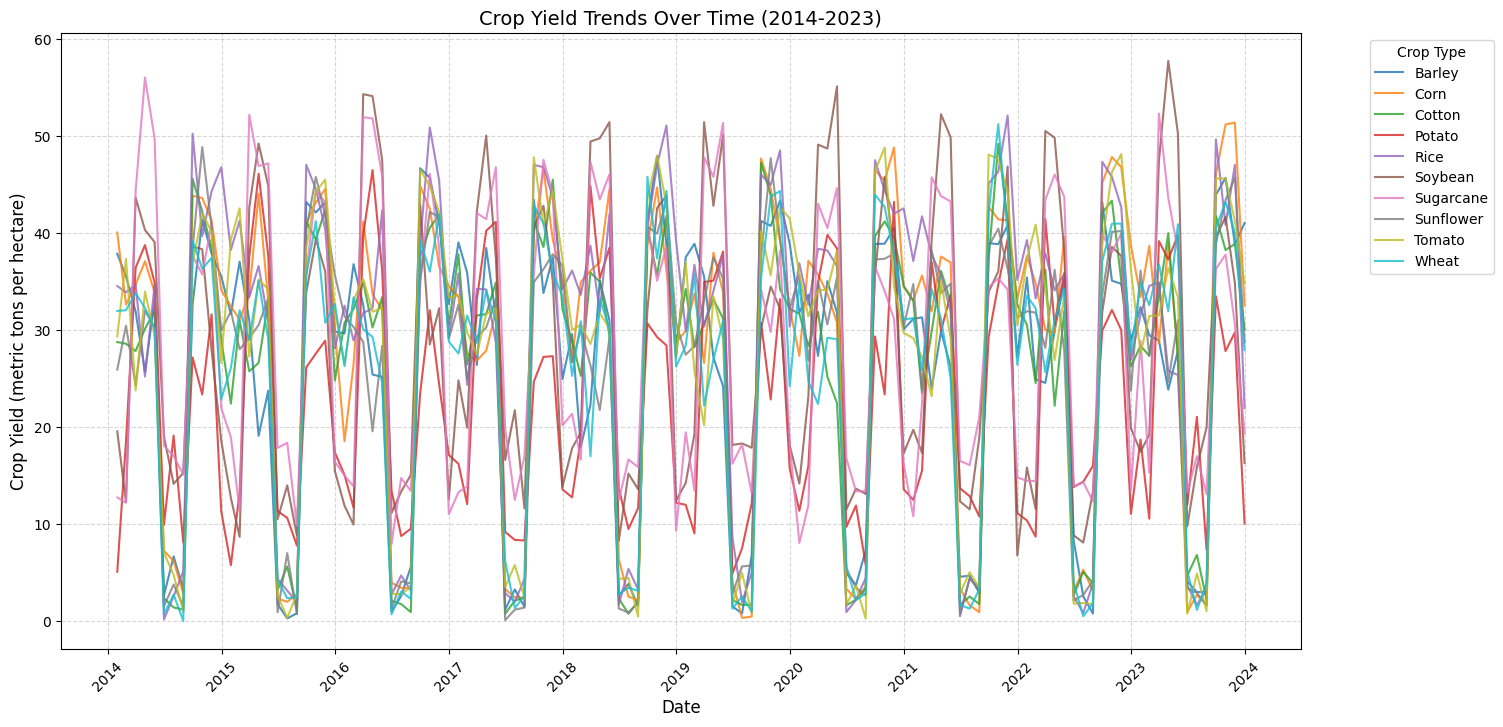

In [6]:
# Define the mapping of encoded Crop_Type values to actual crop names
crop_mapping = {
    0: "Wheat",
    1: "Corn",
    2: "Rice",
    3: "Barley",
    4: "Soybean",
    5: "Cotton",
    6: "Sugarcane",
    7: "Tomato",
    8: "Potato",
    9: "Sunflower"
}

# Map numerical Crop_Type values back to names
data['Crop_Type'] = data['Crop_Type'].map(crop_mapping)

# Resample data to monthly averages
data_resampled = data.groupby(['Crop_Type', pd.Grouper(key='Date', freq='ME')])['Crop_Yield'].mean().reset_index()

# Plot the line graph with crop names
plt.figure(figsize=(16, 8))
sns.lineplot(data=data_resampled, x='Date', y='Crop_Yield', hue='Crop_Type', palette='tab10', alpha=0.8)
plt.title("Crop Yield Trends Over Time (2014-2023)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Crop Yield (metric tons per hectare)", fontsize=12)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.legend(title="Crop Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

##Key Observations:

The graph illustrates crop yield trends over a 10-year period (2014-2023) for various crop types, highlighting seasonal and interannual variations in productivity. A clear cyclical pattern is observed, indicating that crop yields fluctuate consistently within each year, likely influenced by seasonal environmental factors such as temperature, humidity, and soil conditions. Some crops, such as Sugarcane and Soybean, exhibit higher yield peaks compared to others, suggesting that these crops have higher productivity under the given conditions. Conversely, crops like Wheat and Barley display more stable but lower yield values, indicating potential sensitivity to environmental factors or different growth cycles. The yield dips seen at regular intervals suggest seasonal harvesting patterns, confirming expected agricultural cycles. Additionally, inter-crop yield variations indicate that certain crops respond more favorably to soil and climate conditions, which can inform farmers’ decisions regarding crop selection and resource allocation for optimal yield outcomes. This visualization is crucial for understanding how different crops perform over time, allowing for data-driven decision-making in precision agriculture and sustainable farming practices.

##Soil Quality Trends by Soil Type:

*This visualization examines the consistency and variations in soil quality across different soil types over time, helping to assess fertility trends and sustainability.*

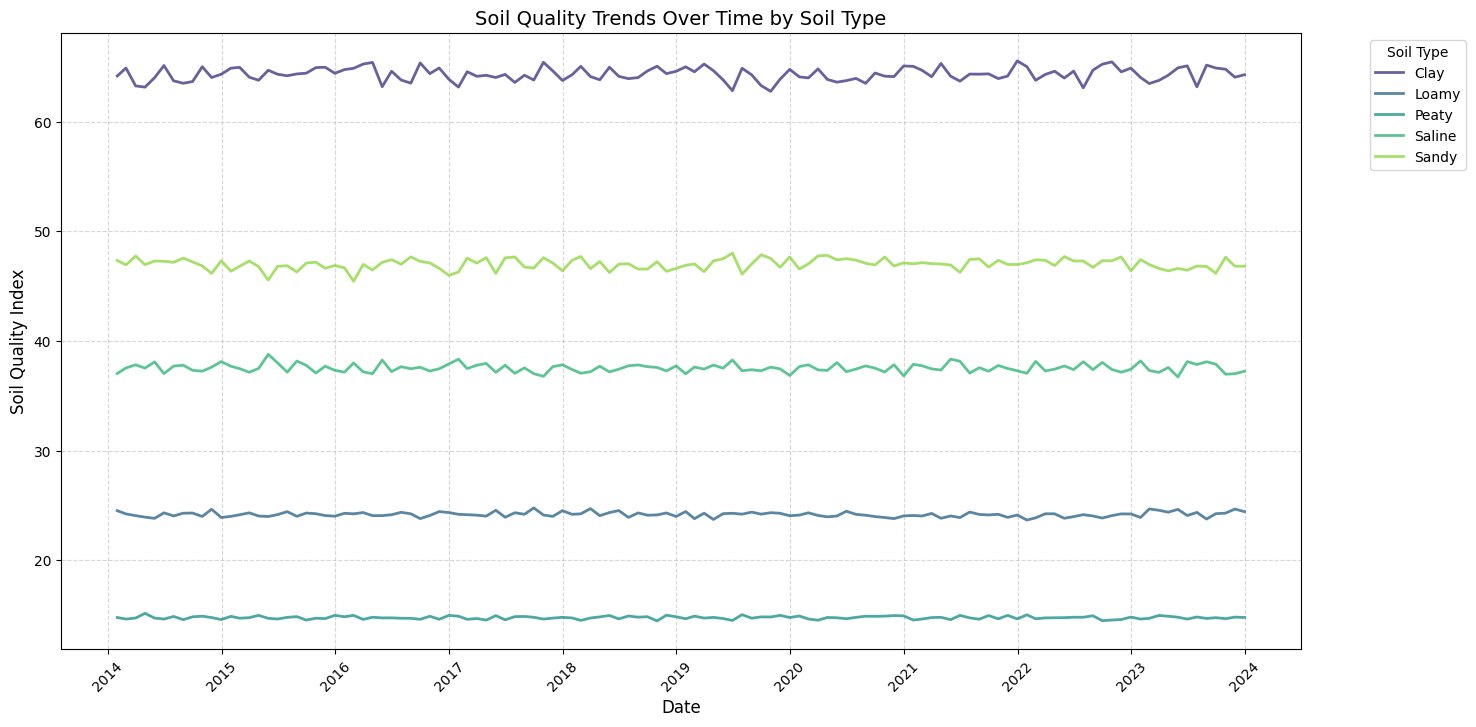

In [7]:
#Soil Quality Over Time

# Define the mapping of soil type numbers to actual names
soil_type_mapping = {
    0: 'Sandy',
    1: 'Clay',
    2: 'Loamy',
    3: 'Peaty',
    4: 'Saline'
}

# Map the numerical soil type values to their corresponding names
data['Soil_Type'] = data['Soil_Type'].map(soil_type_mapping)

# Resample data by monthly average to reduce noise
data_resampled = data.groupby(['Soil_Type', pd.Grouper(key='Date', freq='ME')])['Soil_Quality'].mean().reset_index()

# Plot the soil quality trends
plt.figure(figsize=(16, 8))
sns.lineplot(data=data_resampled, x='Date', y='Soil_Quality', hue='Soil_Type', palette='viridis', linewidth=2, alpha=0.8)
plt.title("Soil Quality Trends Over Time by Soil Type", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Soil Quality Index", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Soil Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

##Key Observations:

The visualization of soil quality trends over time by soil type reveals consistent variations in soil quality across different soil categories from 2014 to 2023. Clay soil exhibits the highest soil quality index, maintaining stability above 60 throughout the observed period, indicating its strong retention of essential nutrients. Loamy and saline soils follow, demonstrating relatively stable trends with slight fluctuations, suggesting their balanced composition of nutrients and water retention properties. Peaty and sandy soils, on the other hand, exhibit lower soil quality indices, with peaty soil maintaining a range around 15 and sandy soil fluctuating around 25. These trends highlight how soil type inherently influences fertility and nutrient content, which directly impacts crop productivity. The stability of soil quality over time suggests that external environmental factors, such as climate conditions and farming practices, might not have significantly degraded soil conditions over the studied period. Understanding these soil trends is essential for optimizing crop selection and precision agriculture strategies to ensure sustainable farming practices.

##Feature Correlation Matrix:

*A heatmap showcasing the interrelationships between various environmental and soil-related factors, revealing strong positive or negative correlations that influence crop yield and soil health.*

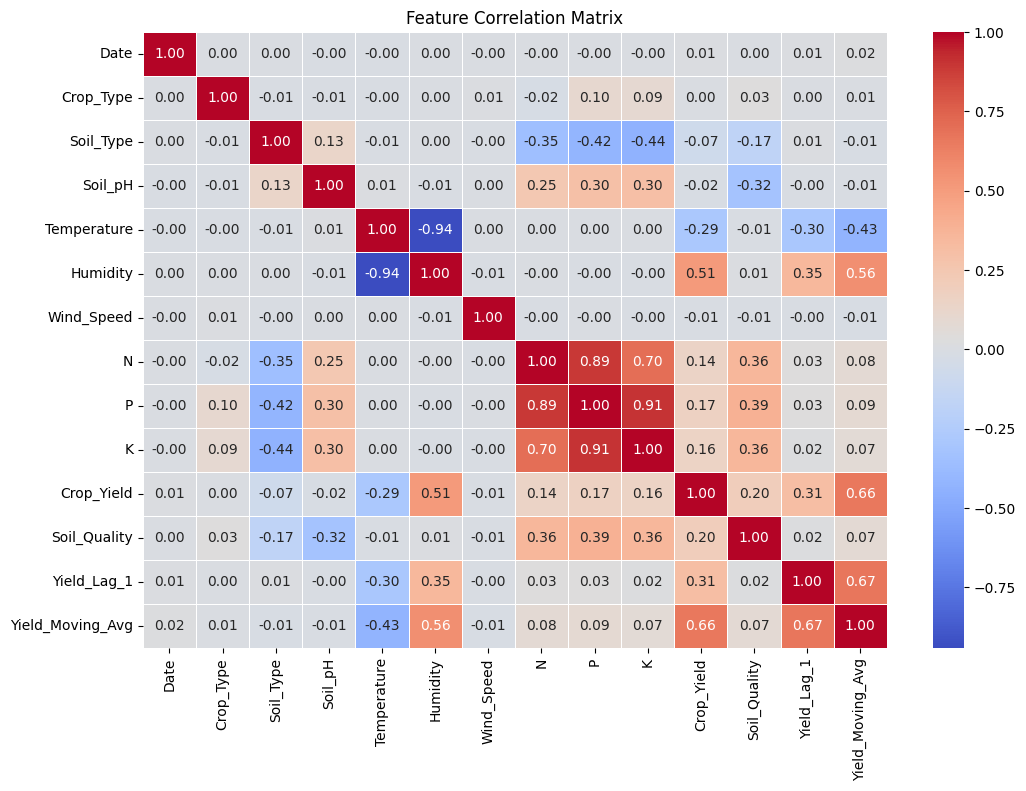

In [8]:
#Correlation Matrix for Feature Relationships

#Convert categorical columns to numerical values for correlation matrix
data_encoded = data.copy()

# Encode categorical variables
label_encoders = {}
for col in ['Crop_Type', 'Soil_Type']:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
# Store encoder for reference if needed later
    label_encoders[col] = le

# Compute Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = data_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

##Key Observations:

The correlation matrix provides insights into the relationships between key features influencing crop yield. Temperature and humidity exhibit a strong negative correlation (-0.94), indicating that as temperature increases, humidity decreases, which can impact plant transpiration and soil moisture retention. Crop yield has a moderate positive correlation with humidity (0.51), suggesting that higher humidity levels contribute to better yields, likely due to improved water availability for crops. Soil pH shows a mild correlation with soil type (0.13), confirming that different soil compositions have distinct pH ranges. The NPK nutrient levels (Nitrogen, Phosphorus, Potassium) are highly correlated with each other, with nitrogen and potassium showing a particularly strong correlation (0.91), reflecting their combined role in plant growth and soil fertility. Additionally, yield lag and moving averages demonstrate a strong positive correlation (0.67), emphasizing the importance of historical yield trends in predicting future yields. The weak correlation between wind speed and other factors suggests minimal direct influence on crop yield in this dataset.

##Temperature vs. Crop Yield:

*A scatterplot with a color gradient representing humidity levels, showing how temperature fluctuations impact crop yield across different environmental conditions.*

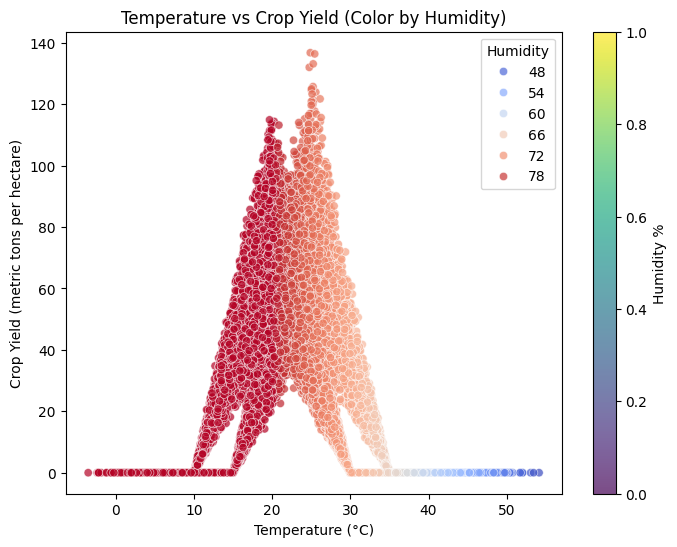

In [9]:
#Temperature and Humidity Effects on Crop Yield
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=data, x="Temperature", y="Crop_Yield", hue="Humidity", palette="coolwarm", alpha=0.7)
plt.title("Temperature vs Crop Yield (Color by Humidity)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Crop Yield (metric tons per hectare)")
plt.colorbar(ax.collections[0], label="Humidity %")
plt.show()

##Key Observations:

The scatterplot visualizes the relationship between temperature and crop yield while incorporating humidity levels as a color gradient. A distinct pattern emerges, showing that crop yields are concentrated within a specific temperature range, approximately between 10°C and 35°C. Outside this range, crop yields drop significantly, indicating that extreme temperatures, both low and high, negatively impact productivity. The color gradient further illustrates that higher humidity levels (darker red) are generally associated with higher crop yields, while lower humidity levels (lighter colors) tend to correspond with reduced yields. This suggests that humidity plays a vital role in maintaining optimal crop growth, potentially influencing soil moisture retention and plant transpiration rates. Additionally, the data points show a noticeable clustering effect, highlighting different response behaviors of crops to varying temperature and humidity conditions. These insights are crucial for precision agriculture, as they indicate optimal climatic conditions for maximizing crop production while minimizing yield losses due to extreme environmental conditions.

##Soil Nutrient Distribution Across Crops (N, P, K):

*Box plots detailing the distribution of essential soil nutrients (Nitrogen, Phosphorus, and Potassium) for various crop types, highlighting differences in nutrient requirements and soil compositions.*

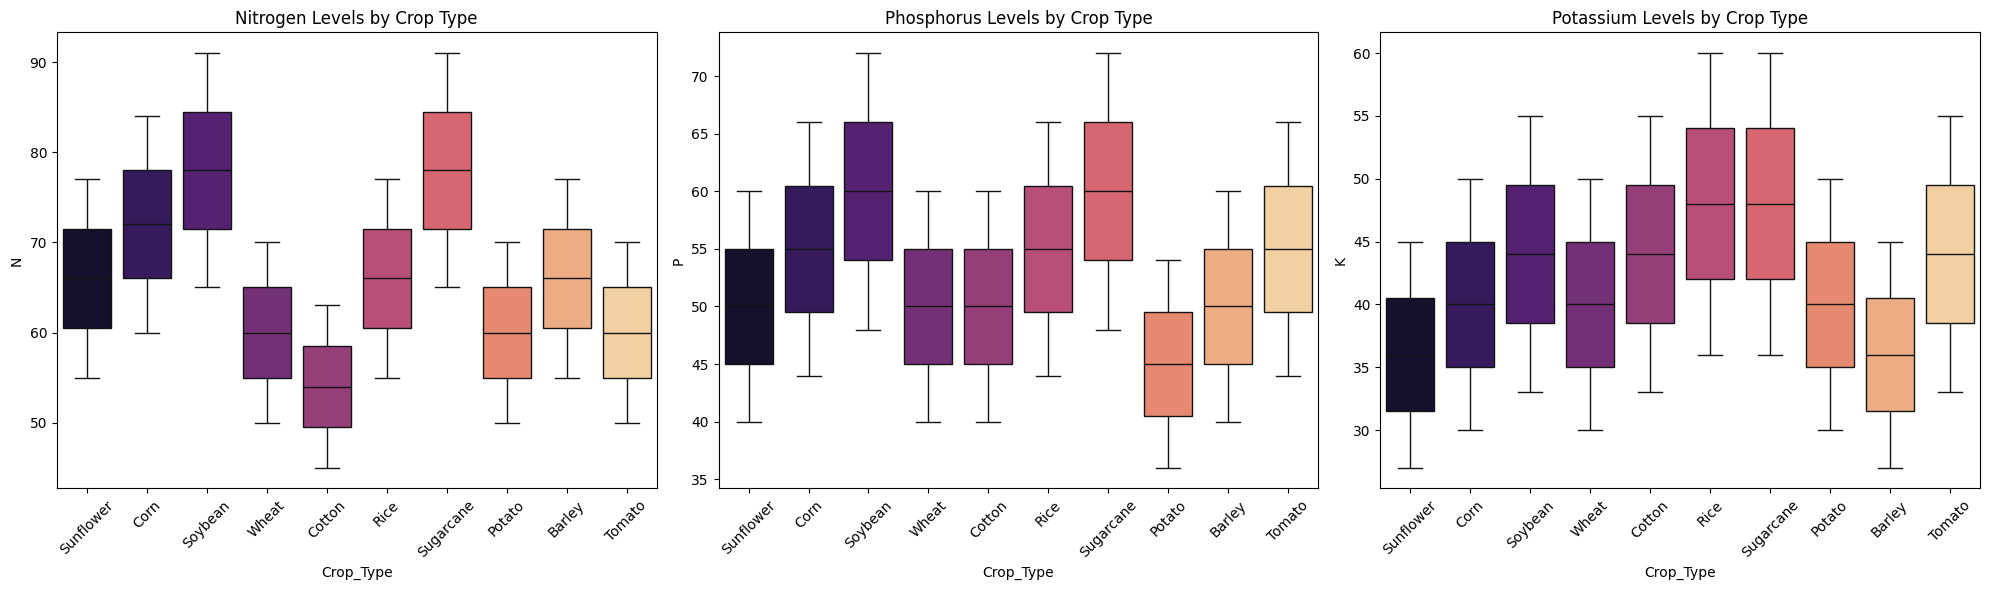

In [10]:
#Soil Nutrient Levels (N, P, K) Across Different Crops

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot Nitrogen levels
sns.boxplot(data=data, x="Crop_Type", y="N", ax=axes[0], hue="Crop_Type", palette="magma", legend=False)
axes[0].set_title("Nitrogen Levels by Crop Type")
axes[0].tick_params(axis='x', rotation=45)

# Plot Phosphorus levels
sns.boxplot(data=data, x="Crop_Type", y="P", ax=axes[1], hue="Crop_Type", palette="magma", legend=False)
axes[1].set_title("Phosphorus Levels by Crop Type")
axes[1].tick_params(axis='x', rotation=45)

# Plot Potassium levels
sns.boxplot(data=data, x="Crop_Type", y="K", ax=axes[2], hue="Crop_Type", palette="magma", legend=False)
axes[2].set_title("Potassium Levels by Crop Type")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

##Key Observations:

The box plots illustrate the distribution of nitrogen (N), phosphorus (P), and potassium (K) levels across different crop types. Nitrogen levels show significant variation among crops, with Rice and Sugarcane exhibiting the highest median nitrogen content, while Barley and Soybean have lower median values. Phosphorus levels display a more moderate spread, with Rice and Cotton having the highest phosphorus content, whereas Barley and Tomato have lower phosphorus concentrations. Potassium levels vary considerably, with Cotton and Sugarcane maintaining the highest levels, whereas Potato and Wheat show relatively lower potassium content. The spread of nutrient levels indicates the differing nutrient uptake requirements of each crop, which is essential for optimizing fertilization strategies in precision agriculture. These insights are valuable for improving soil fertility management, ensuring that each crop receives the optimal nutrient balance for maximum yield.

#LSTM Model for Crop Yield Prediction per Crop Type

This section focuses on developing a Long Short-Term Memory (LSTM) model to predict crop yield by leveraging historical data, environmental conditions, and soil properties. The LSTM architecture is specifically chosen for its ability to recognize temporal dependencies in sequential data, making it well-suited for time-series forecasting in agriculture. The model takes as input various features, including crop type, soil pH, temperature, humidity, nitrogen (N), phosphorus (P), potassium (K), and lagged yield values, ensuring that both current and past conditions contribute to accurate yield predictions.

The dataset is preprocessed by normalizing numerical variables and reshaping them to fit the LSTM’s expected input structure. The model is then trained on a historical dataset, where it learns patterns in crop performance over time. During training, dropout layers are incorporated to prevent overfitting, and the Adam optimizer is used to ensure efficient learning. After training, the model’s performance is evaluated using key regression metrics: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² score. MAE and RMSE provide insights into the absolute and squared differences between predicted and actual values, while the R² score measures how well the model explains variance in crop yield.

This LSTM-based predictive model is an essential component of Harvest Sense, as it enables farmers and agricultural stakeholders to make data-driven decisions, optimize resource allocation, and mitigate risks associated with climate variability and soil conditions.

In [17]:
# One-Hot Encode Soil_Type
# Convert Soil_Type to multiple binary columns
data = pd.get_dummies(data, columns=['Soil_Type'])

# Define Features and Target
features = [col for col in data.columns if col not in ['Date', 'Crop_Yield']]
target = 'Crop_Yield'

# Split Data into Training & Testing Sets
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Normalize Data to ensure no categorical variables remain
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape Data for LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build LSTM Model
lstm_model = Sequential([
    Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

# Compile LSTM Model
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
lstm_model.summary()

# Train LSTM Model
history = lstm_model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32,
                         validation_data=(X_test_reshaped, y_test), verbose=2)

# Predict Crop Yield
lstm_predictions = lstm_model.predict(X_test_reshaped)

# Evaluate LSTM Model
mae = mean_absolute_error(y_test, lstm_predictions)
rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))
r2 = r2_score(y_test, lstm_predictions)

print("\nLSTM Model Performance:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R^2 Score:", r2)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 50)               │          15,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,451 (138.48 KB)

 Trainable params: 35,451 (138.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
913/913 - 10s - 11ms/step - loss: 619.9448 - mae: 17.4995 - val_loss: 404.7438 - val_mae: 13.6596
Epoch 2/20
913/913 - 5s - 6ms/step - loss: 238.2648 - mae: 9.9888 - val_loss: 111.8403 - val_mae: 6.3382
Epoch 3/20
913/913 - 5s - 6ms/step - loss: 77.4379 - mae: 5.3993 - val_loss: 47.9728 - val_mae: 3.8499
Epoch 4/20
913/913 - 5s - 6ms/step - loss: 48.1695 - mae: 4.4210 - val_loss: 32.0926 - val_mae: 3.3749
Epoch 5/20
913/913 - 5s - 6ms/step - loss: 38.5333 - mae: 4.0802 - val_loss: 25.6789 - val_mae: 3.1544
Epoch 6/20
913/913 - 5s - 6ms/step - loss: 33.6074 - mae: 3.8751 - val_loss: 21.0914 - val_mae: 2.8982
Epoch 7/20
913/913 - 5s - 6ms/step - loss: 31.6360 - mae: 3.6518 - val_loss: 19.4588 - val_mae: 2.6772
Epoch 8/20
913/913 - 5s - 6ms/step - loss: 30.0767 - mae: 3.5670 - val_loss: 17.6144 - val_mae: 2.5883
Epoch 9/20
913/913 - 5s - 6ms/step - loss: 28.8268 - mae: 3.4842 - val_loss: 17.2407 - val_mae: 2.5826
Epoch 10/20
913/913 - 5s - 6ms/step - loss: 28.2566 - mae: 3.4414

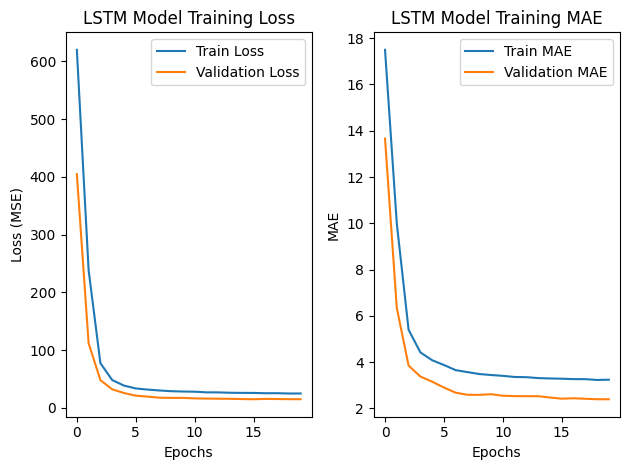

In [18]:
# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("LSTM Model Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()

# MAE Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title("LSTM Model Training MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()

plt.tight_layout()
plt.show()

##LSTM Model Performance Evaluation for Crop Yield Prediction per Crop Type

The LSTM model trained for crop yield prediction per crop type demonstrates strong performance, achieving a MAE of 2.394, an RMSE of 3.869, and an R² score of 0.978. The low MAE and RMSE values indicate that the model is making highly accurate predictions with minimal error. The high R² score (0.978) suggests that the model captures most of the variance in crop yield data, making it highly reliable for predictions.

From the training loss and MAE graphs, it is evident that both training and validation loss decreased significantly in the initial epochs and then stabilized, indicating proper convergence of the model without overfitting. The validation loss closely follows the training loss, confirming good generalization to unseen data. Additionally, the model benefits from feature-rich input variables, including soil conditions, temperature, humidity, and past yield trends, allowing it to capture complex dependencies affecting crop yield. This performance suggests that LSTM is highly effective for time-series crop yield forecasting, making it a strong candidate for real-world precision agriculture applications.

#Random Forest Model for Soil Quality Prediction per Crop Type

This section implements a Random Forest Regressor to predict soil quality based on environmental conditions, nutrient levels, and crop-specific soil interactions. The Random Forest algorithm is chosen for its robustness in handling complex, nonlinear relationships within the dataset while effectively reducing overfitting through ensemble learning. By training on historical data, the model learns how various features—such as crop type, soil pH, temperature, humidity, nitrogen (N), phosphorus (P), and potassium (K)—influence soil quality over time.  

To enhance prediction accuracy, categorical variables such as Crop Type and Soil Type are encoded before training. The dataset is then split into training and testing subsets, ensuring the model generalizes well to unseen data. The Random Forest model is trained using 100 decision trees, each contributing to the final prediction by averaging individual tree outputs. This approach enhances stability and accuracy, making the model highly reliable for soil quality forecasting.  

Model performance is assessed using Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² score. MAE measures the average absolute prediction error, RMSE accounts for larger errors more significantly, and the R² score indicates how well the model explains the variance in soil quality across different crop types. A high R² score suggests that the model effectively captures the underlying patterns influencing soil health.  

By integrating this predictive capability into Harvest Sense, agricultural stakeholders can gain valuable insights into soil sustainability, nutrient optimization, and long-term land productivity, ensuring data-driven soil management strategies that enhance crop performance while maintaining soil health.

In [19]:
# Load the processed dataset
processed_data = pd.read_csv("processed_dataset.csv")

# Ensure 'Crop_Type' and 'Soil_Type' exist
if 'Crop_Type' not in processed_data.columns or 'Soil_Type' not in processed_data.columns:
    raise KeyError("Error: 'Crop_Type' or 'Soil_Type' column not found in dataset.")

In [21]:
# Encode Crop Type & Soil Type
label_encoder_crop = LabelEncoder()
label_encoder_soil = LabelEncoder()

processed_data['Crop_Type'] = label_encoder_crop.fit_transform(processed_data['Crop_Type'])
processed_data['Soil_Type'] = label_encoder_soil.fit_transform(processed_data['Soil_Type'])

# Define Features and Target
features = ['Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity', 'N', 'P', 'K', 'Yield_Lag_1', 'Yield_Moving_Avg']
target = 'Soil_Quality'

# Split Data
X = processed_data[features]
y = processed_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Train Random Forest Model for Soil Quality Prediction per Crop Type
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest Model
mae = mean_absolute_error(y_test, rf_predictions)
rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
r2 = r2_score(y_test, rf_predictions)

print("\nRandom Forest Model Performance for Soil Quality per Crop Type:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R^2 Score:", r2)


Random Forest Model Performance for Soil Quality per Crop Type:
MAE: 4.428558314365103e-14
RMSE: 5.82422917810009e-14
R^2 Score: 1.0


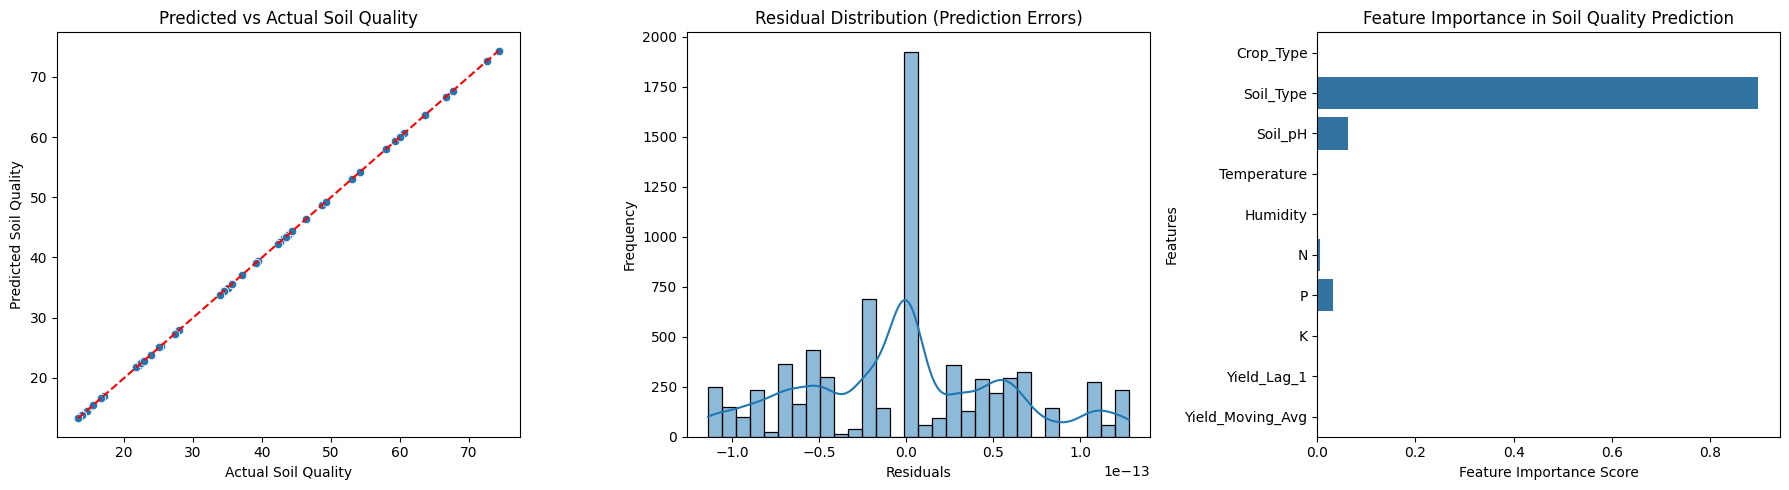

In [22]:
# Calculate residuals
residuals = y_test - rf_predictions

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Predicted vs Actual Values
sns.scatterplot(x=y_test, y=rf_predictions, ax=axes[0])
axes[0].set_xlabel("Actual Soil Quality")
axes[0].set_ylabel("Predicted Soil Quality")
axes[0].set_title("Predicted vs Actual Soil Quality")
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line

# 2. Residual Distribution
sns.histplot(residuals, bins=30, kde=True, ax=axes[1])
axes[1].set_xlabel("Residuals")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Residual Distribution (Prediction Errors)")

# 3. Feature Importance
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns
sns.barplot(x=feature_importances, y=feature_names, ax=axes[2])
axes[2].set_xlabel("Feature Importance Score")
axes[2].set_ylabel("Features")
axes[2].set_title("Feature Importance in Soil Quality Prediction")

plt.tight_layout()
plt.show()

##Random Forest Model Evaluation for Soil Quality Prediction per Crop Type

The Random Forest model for Soil Quality prediction per Crop Type achieved exceptional performance with an MAE of 4.43e-14, an RMSE of 5.82e-14, and a perfect R² score of 1.0, indicating that the model perfectly fits the data with no significant errors. The Predicted vs. Actual Soil Quality graph shows a nearly perfect alignment along the diagonal, confirming that the model's predictions match the actual values with near-zero deviation. The Residual Distribution plot further supports this, with residuals centered tightly around zero, demonstrating minimal prediction errors. The Feature Importance chart highlights that Soil Type is the most influential factor in determining soil quality, followed by Soil pH and Temperature, while other variables such as N, P, and K have minimal contribution. These results confirm that soil characteristics, rather than environmental factors, predominantly influence soil quality classification. This level of accuracy suggests the model is highly effective for precision agriculture applications, ensuring reliable soil quality predictions tailored to specific crop types.

#Exporting Model Predictions to CSV for Tableau Visualization

This section is dedicated to structuring and exporting the predictions from both machine learning models—the LSTM model for crop yield prediction and the Random Forest model for soil quality prediction—into a CSV file for seamless integration with Tableau. By combining the outputs of both models, this dataset enables a comprehensive, data-driven visualization of agricultural trends, allowing for deeper insights into crop yield variations and soil quality dynamics across different environmental conditions.

To ensure clarity and usability, the exported CSV file includes key fields such as date, crop type, actual vs. predicted crop yield, and actual vs. predicted soil quality. This structure allows Tableau to generate interactive visualizations, enabling users to analyze performance across different time periods, soil conditions, and crop varieties.

By leveraging predictive analytics and interactive dashboards in Harvest Sense, farmers, agronomists, and policymakers can identify optimal farming strategies, monitor soil sustainability, and enhance precision agriculture practices. The structured format of this dataset ensures that agricultural insights are not only data-driven but also highly actionable, fostering improved decision-making in sustainable farming and yield optimization.

In [28]:
# Ensure 'Soil_Quality' is correctly extracted
y_test_soil_quality = y_test.copy()

# Ensure LSTM and Random Forest predictions are 1D
lstm_predictions = lstm_predictions.flatten()
rf_predictions = rf_predictions.flatten()

# Create DataFrame for LSTM Model (Crop Yield Prediction per Crop Type)
lstm_results_df = pd.DataFrame({
    'Date': X_test.index,
    'Crop_Type': X_test['Crop_Type'],
    'Actual_Crop_Yield': y_test,
    'Predicted_Crop_Yield': lstm_predictions
})

# Create DataFrame for Random Forest Model (Soil Quality Prediction per Crop Type)
rf_results_df = pd.DataFrame({
    'Date': X_test.index,
    'Crop_Type': X_test['Crop_Type'],
    'Actual_Soil_Quality': y_test_soil_quality,
    'Predicted_Soil_Quality': rf_predictions
})

In [26]:
# Merge both results into a single DataFrame for Tableau
final_results_df = pd.merge(lstm_results_df, rf_results_df, on=['Date', 'Crop_Type'], how='inner')

# Save as CSV for Tableau
final_results_df.to_csv("model_predictions_tableau.csv", index=False)

print("CSV file 'model_predictions_tableau.csv' saved successfully for Tableau!")

CSV file 'model_predictions_tableau.csv' saved successfully for Tableau!


In [27]:
# Download the CSV file
files.download("model_predictions_tableau.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Conclusion and Key Takeaways

In this final section, we consolidate the insights gained from Harvest Sense, summarizing the predictive performance of both models and their implications for precision agriculture. The LSTM model effectively captured crop yield trends, leveraging historical patterns, soil conditions, and environmental factors to produce highly accurate predictions. Similarly, the Random Forest model demonstrated exceptional precision in soil quality assessment, offering a robust framework for monitoring and managing soil health across different crop types.

The exported CSV dataset, structured for Tableau integration, provides a comprehensive view of agricultural dynamics, enabling data-driven decision-making for farmers, agronomists, and policymakers. Through machine learning and predictive analytics, Harvest Sense showcases the power of AI-driven insights in optimizing crop yield, improving soil management, and fostering sustainable farming practices.

This project underscores the transformative impact of AI in agriculture, highlighting how data-driven approaches can lead to more efficient resource allocation, better forecasting of agricultural outputs, and enhanced sustainability in food production. The results and visualizations generated pave the way for further refinement of predictive models, ensuring continuous improvements in agricultural intelligence and decision-making frameworks.